<a href="https://colab.research.google.com/github/sajeebju/Deep-Learning/blob/main/Augmentation-FlowersDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

data_dir = pathlib.Path(data_dir)

data_dir

228818944/228813984 [==============================] - 1s 0us/step


PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6039330368_c30ed224c4_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16374919860_4e445de29f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg')]

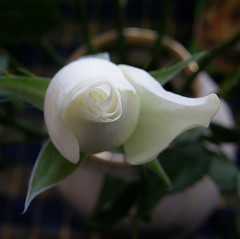

In [9]:
PIL.Image.open(str(roses[1]))

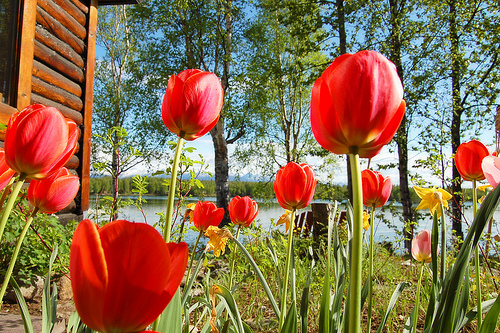

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [12]:
flowers_images_dict = {
     'roses' : list(data_dir.glob('roses/*')),
     'daisy' : list(data_dir.glob('daisy/*')),
     'dandelion' : list(data_dir.glob('dandelion/*')),
     'sunflower' : list(data_dir.glob('sunflower/*')),
     'tulips' : list(data_dir.glob('tulips/*')),


}

In [14]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower': 3,
    'tulips' : 4
}

In [17]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(213, 320, 3)

In [18]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [19]:
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflower
0
tulips
799


In [27]:
X, y = [], []

for flower_names, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img  = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_names])

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [31]:
X_train = X_train / 255
X_test = X_test / 255

In [33]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
70/70 [==============================] - 9s 21ms/step - loss: 1.4520 - accuracy: 0.3237
Epoch 2/10
70/70 [==============================] - 1s 19ms/step - loss: 0.9647 - accuracy: 0.5884
Epoch 3/10
70/70 [==============================] - 1s 19ms/step - loss: 0.7942 - accuracy: 0.6788
Epoch 4/10
70/70 [==============================] - 1s 19ms/step - loss: 0.6152 - accuracy: 0.7501
Epoch 5/10
70/70 [==============================] - 1s 19ms/step - loss: 0.4689 - accuracy: 0.8321
Epoch 6/10
70/70 [==============================] - 1s 19ms/step - loss: 0.3114 - accuracy: 0.8965
Epoch 7/10
70/70 [==============================] - 1s 20ms/step - loss: 0.1767 - accuracy: 0.9501
Epoch 8/10
70/70 [==============================] - 1s 19ms/step - loss: 0.1097 - accuracy: 0.9708
Epoch 9/10
70/70 [==============================] - 1s 19ms/step - loss: 0.0672 - accuracy: 0.9781
Epoch 10/10
70/70 [==============================] - 1s 19ms/step - loss: 0.0362 - accuracy: 0.9925


In [35]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 12ms/step - loss: 2.0603 - accuracy: 0.5882


[2.060304880142212, 0.5881561040878296]

In [36]:
predictions = model.predict(X_test)
predictions

array([[  3.8100774 ,  11.485554  ,  14.756327  , -18.105074  ,
         -9.675257  ],
       [  2.3415654 ,  -0.2379331 ,   3.8422968 , -11.988247  ,
          1.825387  ],
       [  5.1573286 ,   0.5578854 ,  -2.4066138 ,  -9.340758  ,
          3.427258  ],
       ...,
       [  0.18702449,   9.035077  ,   9.631811  , -26.608517  ,
         -1.7596154 ],
       [ 12.838325  ,   5.026568  ,  -4.611178  , -27.046797  ,
          9.657355  ],
       [  4.1168966 ,   0.8709697 ,  -1.492275  , -17.59001   ,
          9.47549   ]], dtype=float32)

In [37]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6978891e-05, 3.6586951e-02, 9.6339601e-01, 5.1556079e-15,
       2.3621256e-11], dtype=float32)>

In [39]:
np.argmax(score)

2

In [40]:
y_test[0]

2

In [53]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
                  
])

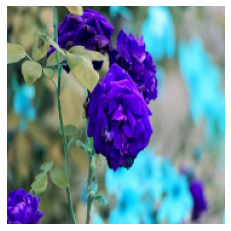

In [50]:
plt.axis('off')
plt.imshow(X[0])

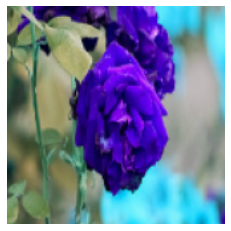

In [51]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Model with Augmentation and Dropout

In [54]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])

In [56]:
model.fit(X_train, y_train, epochs= 20)

Epoch 1/20
70/70 [==============================] - 2s 27ms/step - loss: 0.9666 - accuracy: 0.6100
Epoch 2/20
70/70 [==============================] - 2s 26ms/step - loss: 0.8484 - accuracy: 0.6629
Epoch 3/20
70/70 [==============================] - 2s 26ms/step - loss: 0.7892 - accuracy: 0.6849
Epoch 4/20
70/70 [==============================] - 2s 26ms/step - loss: 0.7446 - accuracy: 0.7006
Epoch 5/20
70/70 [==============================] - 2s 27ms/step - loss: 0.7159 - accuracy: 0.7136
Epoch 6/20
70/70 [==============================] - 2s 26ms/step - loss: 0.6891 - accuracy: 0.7253
Epoch 7/20
70/70 [==============================] - 2s 26ms/step - loss: 0.6521 - accuracy: 0.7496
Epoch 8/20
70/70 [==============================] - 2s 26ms/step - loss: 0.6596 - accuracy: 0.7473
Epoch 9/20
70/70 [==============================] - 2s 26ms/step - loss: 0.6077 - accuracy: 0.7590
Epoch 10/20
70/70 [==============================] - 2s 27ms/step - loss: 0.5918 - accuracy: 0.7796
Epoch 11/

In [57]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 10ms/step - loss: 0.8103 - accuracy: 0.7120


[0.8102595210075378, 0.7119784951210022]